# Music Recommendation:

## Importing libraries

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading data

In [2]:
import pandas as pd
members = pd.read_csv("data/members.csv")
train = pd.read_csv("data/train.csv")
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [3]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
7377413,6xdFzPlrasIDD95mQWXVC3Bg4ptnGYtBl4ztVEZMddU=,VJTxizih/o28kXCbtPbIyWXScoXGvxyYtl6R+0YB5JM=,my library,Local playlist more,local-playlist,1
7377414,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,z1mqaU9YOX7T/PFDvUoWozdFq7rC3KwaQP7nFVprjMI=,search,Search,song,0
7377415,ZxbVmt3Kh/XOH+h58c2Kdj6SjFZk+wnUO006IgWzMQE=,750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=,search,Search,song,1
7377416,0aH4Hd3ziPSRHClRX8rkeOEaAG5EPPkW1mKGCdXEok0=,G8wgqObgeAMER/rVCIlgcNeQ8mm0CzF/GsxiMK8TTnA=,discover,Discover Genre,online-playlist,1


## source types

In [4]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

In [5]:
train['source_type'].dropna().unique()

array(['online-playlist', 'local-playlist', 'local-library',
       'top-hits-for-artist', 'album', 'song-based-playlist', 'radio',
       'song', 'listen-with', 'artist', 'topic-article-playlist',
       'my-daily-playlist'], dtype=object)

In [6]:
train.source_type.value_counts()

local-library             2261399
online-playlist           1967924
local-playlist            1079503
radio                      483109
album                      477344
top-hits-for-artist        423614
song                       244722
song-based-playlist        210527
listen-with                192842
topic-article-playlist      11194
artist                       3038
my-daily-playlist             663
Name: source_type, dtype: int64

<AxesSubplot: >

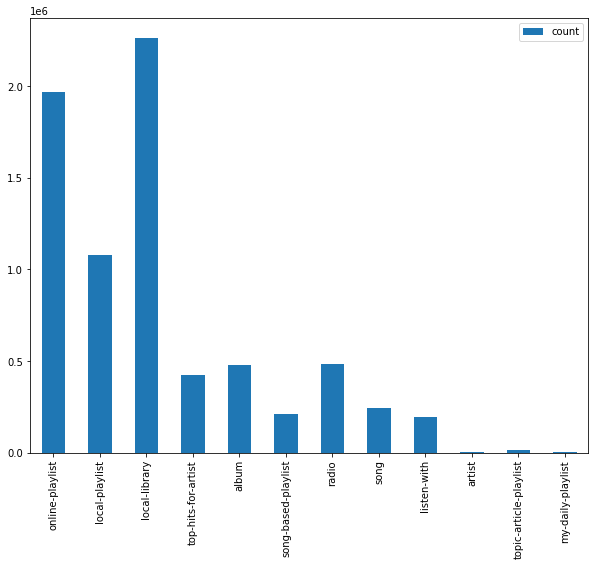

In [7]:
df = pd.DataFrame({'count':train.source_type.value_counts()} ,index=train['source_type'].dropna().unique())
df.plot(kind="bar",figsize=(10, 8))

<AxesSubplot: >

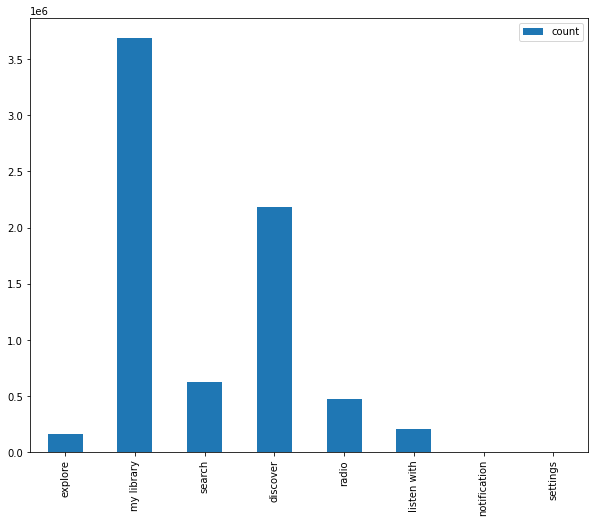

In [8]:
df = pd.DataFrame({'count':train.source_system_tab.value_counts()} ,index=train['source_system_tab'].dropna().unique())
df.plot(kind="bar",figsize=(10, 8))

<AxesSubplot: >

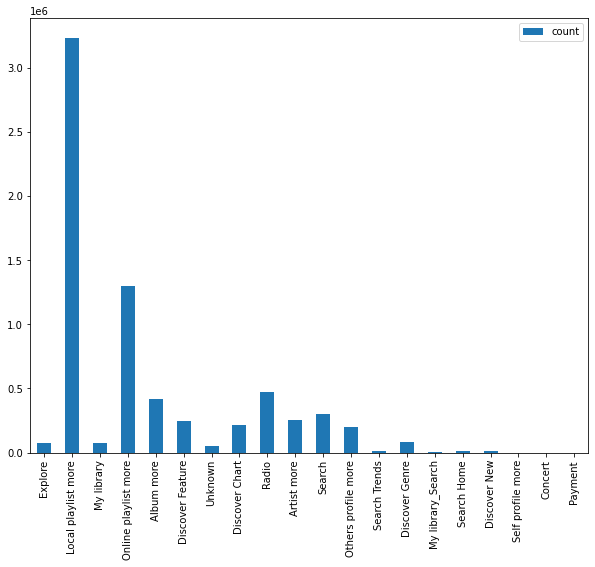

In [9]:
df = pd.DataFrame({'count':train.source_screen_name.value_counts()} ,index=train['source_screen_name'].dropna().unique())
df.plot(kind="bar",figsize=(10, 8))

In [10]:
a=dict(train.song_id.value_counts()) #temporary variable
top_songs=sorted(a.items(), key=lambda x:x[1],reverse=True)
top_songs=top_songs[:10] #extracting top 10 songs
top_songs

[('reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=', 13973),
 ('T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=', 13293),
 ('wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=', 13079),
 ('FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=', 12855),
 ('PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=', 12004),
 ('YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=', 11835),
 ('M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=', 11745),
 ('U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=', 11521),
 ('43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=', 11131),
 ('cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=', 10791)]

In [11]:
songs = pd.read_csv("data/songs.csv")
songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0


## getting top artists

In [12]:
x=[]
for i in top_songs:
    x.append(str(songs[songs["song_id"]==i[0]]["artist_name"]))
x

['6692    周湯豪 (NICKTHEREAL)\nName: artist_name, dtype: object',
 '1305441    周杰倫 (Jay Chou)\nName: artist_name, dtype: object',
 '1938251    田馥甄 (Hebe)\nName: artist_name, dtype: object',
 '1297626    Eric 周興哲\nName: artist_name, dtype: object',
 '244856    謝和弦 (R-chord)\nName: artist_name, dtype: object',
 '14719    陳奕迅 (Eason Chan)\nName: artist_name, dtype: object',
 '68238    林俊傑 (JJ Lin)\nName: artist_name, dtype: object',
 '92323    周杰倫 (Jay Chou)\nName: artist_name, dtype: object',
 '941735    五月天 (Mayday)\nName: artist_name, dtype: object',
 '287605    五月天 (Mayday)\nName: artist_name, dtype: object']

## getting languages

<AxesSubplot: >

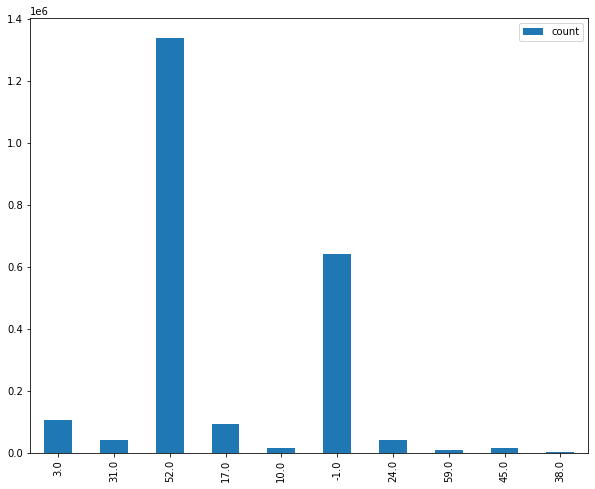

In [13]:
df = pd.DataFrame({'count':songs.language.value_counts()} ,index=songs['language'].dropna().unique())
df.plot(kind="bar",figsize=(10, 8))

In [14]:
train=pd.read_csv("data/train.csv",names=train.columns,skiprows=7000,nrows=3000)
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,1
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,1
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,1
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,0
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,0
...,...,...,...,...,...,...
2995,Nkav9NHW125EBubpy0s/zsC5kcwBK58aFBcHH4l9tqY=,c1XhogBZkWcjQv8NfrQpFNkGScf2X346zCmwhScBSUs=,my library,Local playlist more,local-library,1
2996,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,CoqAdkNaXj/LmURtTzJsp648jU3l+80eaOxCXDK1w6I=,my library,NaN,top-hits-for-artist,1
2997,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,eExyzh5FVJYlRFGr4edl1oaGcUYgpfcYA8KKyS6nypU=,my library,NaN,top-hits-for-artist,1
2998,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,SBDpmvkE5OQHwA75K9liYM0JaLsIPQ822tW/vwR87AQ=,my library,Local playlist more,local-playlist,1


In [15]:
test = train.drop(['target'],axis=1)
ytr = np.array(train['target'])
test

,msno,song_id,source_system_tab,source_screen_name,source_type
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist
...,...,...,...,...,...
2995,Nkav9NHW125EBubpy0s/zsC5kcwBK58aFBcHH4l9tqY=,c1XhogBZkWcjQv8NfrQpFNkGScf2X346zCmwhScBSUs=,my library,Local playlist more,local-library
2996,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,CoqAdkNaXj/LmURtTzJsp648jU3l+80eaOxCXDK1w6I=,my library,NaN,top-hits-for-artist
2997,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,eExyzh5FVJYlRFGr4edl1oaGcUYgpfcYA8KKyS6nypU=,my library,NaN,top-hits-for-artist
2998,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,SBDpmvkE5OQHwA75K9liYM0JaLsIPQ822tW/vwR87AQ=,my library,Local playlist more,local-playlist


In [16]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(3000)
test = test[test_name]

In [17]:
songs=songs.drop(["composer","lyricist"],axis=1)
train = train.merge(songs, on='song_id', how='left')
test = test.merge(songs, on='song_id', how='left')

In [18]:
test

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,language
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,268120,465,謝和弦 (R-chord),3.0
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,265926,465,謝和弦 (R-chord),3.0
2,2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,217896,458,王菀之 (Ivana Wong),3.0
3,3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,197926,921,Thomas Newman,52.0
4,4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,110759,921,Marcelo Zarvos,52.0
...,...,...,...,...,...,...,...,...,...,...
2995,2995,Nkav9NHW125EBubpy0s/zsC5kcwBK58aFBcHH4l9tqY=,c1XhogBZkWcjQv8NfrQpFNkGScf2X346zCmwhScBSUs=,my library,Local playlist more,local-library,245655,465,戴佩妮 (Penny Tai),3.0
2996,2996,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,CoqAdkNaXj/LmURtTzJsp648jU3l+80eaOxCXDK1w6I=,my library,NaN,top-hits-for-artist,236007,465,Muse,52.0
2997,2997,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,eExyzh5FVJYlRFGr4edl1oaGcUYgpfcYA8KKyS6nypU=,my library,NaN,top-hits-for-artist,263026,359,Muse,52.0
2998,2998,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,SBDpmvkE5OQHwA75K9liYM0JaLsIPQ822tW/vwR87AQ=,my library,Local playlist more,local-playlist,240222,465,蕭敬騰 (Jam Hsiao),3.0


## adjusting date of members dataset

In [19]:
members

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [20]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)
members

,msno,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20,2011,8,20,2017,9
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,22,2015,6,28,2017,6
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,12,2016,4,11,2017,7
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,7,2015,9,6,2015,9
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,13,2017,1,26,2017,6
...,...,...,...,...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,10,2013,11,11,2017,9
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,18,2014,10,24,2017,5
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,8,2013,8,2,2017,9
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20,2015,10,20,2017,9


In [21]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [22]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,1,268120,465,謝和弦 (R-chord),3.0,12,35,female,9,10,2014,2,9,2017,9
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,1,265926,465,謝和弦 (R-chord),3.0,12,35,female,9,10,2014,2,9,2017,9
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,1,217896,458,王菀之 (Ivana Wong),3.0,12,35,female,9,10,2014,2,9,2017,9
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,0,197926,921,Thomas Newman,52.0,1,0,NaN,7,17,2016,8,18,2017,9
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,0,110759,921,Marcelo Zarvos,52.0,1,0,NaN,7,17,2016,8,18,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Nkav9NHW125EBubpy0s/zsC5kcwBK58aFBcHH4l9tqY=,c1XhogBZkWcjQv8NfrQpFNkGScf2X346zCmwhScBSUs=,my library,Local playlist more,local-library,1,245655,465,戴佩妮 (Penny Tai),3.0,1,0,NaN,7,9,2011,6,24,2017,9
2996,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,CoqAdkNaXj/LmURtTzJsp648jU3l+80eaOxCXDK1w6I=,my library,NaN,top-hits-for-artist,1,236007,465,Muse,52.0,1,0,NaN,7,20,2015,11,21,2017,9
2997,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,eExyzh5FVJYlRFGr4edl1oaGcUYgpfcYA8KKyS6nypU=,my library,NaN,top-hits-for-artist,1,263026,359,Muse,52.0,1,0,NaN,7,20,2015,11,21,2017,9
2998,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,SBDpmvkE5OQHwA75K9liYM0JaLsIPQ822tW/vwR87AQ=,my library,Local playlist more,local-playlist,1,240222,465,蕭敬騰 (Jam Hsiao),3.0,1,0,NaN,7,20,2015,11,21,2017,9


In [23]:
print(train.isna().sum())
print(test.isna().sum())

msno                     0
song_id                  0
source_system_tab        6
source_screen_name      79
source_type              6
target                   0
song_length              0
genre_ids               50
artist_name              0
language                 0
city                     0
bd                       0
gender                1139
registered_via           0
expiration_date          0
registration_year        0
registration_month       0
registration_date        0
expiration_year          0
expiration_month         0
dtype: int64
id                       0
msno                     0
song_id                  0
source_system_tab        6
source_screen_name      79
source_type              6
song_length              0
genre_ids               50
artist_name              0
language                 0
city                     0
bd                       0
gender                1139
registered_via           0
expiration_date          0
registration_year        0
registration_mo

In [24]:
train = train.fillna(-1)
test = test.fillna(-1)

In [25]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,1,268120,465,謝和弦 (R-chord),3.0,12,35,female,9,10,2014,2,9,2017,9
1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,1,265926,465,謝和弦 (R-chord),3.0,12,35,female,9,10,2014,2,9,2017,9
2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,1,217896,458,王菀之 (Ivana Wong),3.0,12,35,female,9,10,2014,2,9,2017,9
3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,0,197926,921,Thomas Newman,52.0,1,0,-1,7,17,2016,8,18,2017,9
4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,0,110759,921,Marcelo Zarvos,52.0,1,0,-1,7,17,2016,8,18,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Nkav9NHW125EBubpy0s/zsC5kcwBK58aFBcHH4l9tqY=,c1XhogBZkWcjQv8NfrQpFNkGScf2X346zCmwhScBSUs=,my library,Local playlist more,local-library,1,245655,465,戴佩妮 (Penny Tai),3.0,1,0,-1,7,9,2011,6,24,2017,9
2996,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,CoqAdkNaXj/LmURtTzJsp648jU3l+80eaOxCXDK1w6I=,my library,-1,top-hits-for-artist,1,236007,465,Muse,52.0,1,0,-1,7,20,2015,11,21,2017,9
2997,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,eExyzh5FVJYlRFGr4edl1oaGcUYgpfcYA8KKyS6nypU=,my library,-1,top-hits-for-artist,1,263026,359,Muse,52.0,1,0,-1,7,20,2015,11,21,2017,9
2998,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,SBDpmvkE5OQHwA75K9liYM0JaLsIPQ822tW/vwR87AQ=,my library,Local playlist more,local-playlist,1,240222,465,蕭敬騰 (Jam Hsiao),3.0,1,0,-1,7,20,2015,11,21,2017,9


In [26]:
test

,id,msno,song_id,source_system_tab,source_screen_name,source_type,song_length,genre_ids,artist_name,language,city,bd,gender,registered_via,expiration_date,registration_year,registration_month,registration_date,expiration_year,expiration_month
0,0,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,gpioqmDgSWfpkkCSQts5GMAGaM1TFH5zpVawYOjxIog=,my library,Local playlist more,local-library,268120,465,謝和弦 (R-chord),3.0,12,35,female,9,10,2014,2,9,2017,9
1,1,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,CQ8ouYUSxeEMbNaql4pAL35CqqJKgd0Ms7tH3DmHOJ8=,my library,Local playlist more,local-library,265926,465,謝和弦 (R-chord),3.0,12,35,female,9,10,2014,2,9,2017,9
2,2,RdINwi/2oZyfF8FR5XiSONsD3acLPF31HJ67ZMd1Gt0=,NA/ZT/ard6XUWrnCvqbEnQLiXnYyP2m4Zq3jWvjLCPY=,my library,Local playlist more,local-library,217896,458,王菀之 (Ivana Wong),3.0,12,35,female,9,10,2014,2,9,2017,9
3,3,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,wloUHWvwV3EYBJsb0hUG1tIeRlgkrf8QzkootXtY/v0=,search,Online playlist more,online-playlist,197926,921,Thomas Newman,52.0,1,0,-1,7,17,2016,8,18,2017,9
4,4,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,UZ75pCG2butQs9dVI1s4tedeDZGRwQ551HGdRsVm29Y=,search,Online playlist more,online-playlist,110759,921,Marcelo Zarvos,52.0,1,0,-1,7,17,2016,8,18,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2995,Nkav9NHW125EBubpy0s/zsC5kcwBK58aFBcHH4l9tqY=,c1XhogBZkWcjQv8NfrQpFNkGScf2X346zCmwhScBSUs=,my library,Local playlist more,local-library,245655,465,戴佩妮 (Penny Tai),3.0,1,0,-1,7,9,2011,6,24,2017,9
2996,2996,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,CoqAdkNaXj/LmURtTzJsp648jU3l+80eaOxCXDK1w6I=,my library,-1,top-hits-for-artist,236007,465,Muse,52.0,1,0,-1,7,20,2015,11,21,2017,9
2997,2997,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,eExyzh5FVJYlRFGr4edl1oaGcUYgpfcYA8KKyS6nypU=,my library,-1,top-hits-for-artist,263026,359,Muse,52.0,1,0,-1,7,20,2015,11,21,2017,9
2998,2998,jfuGlC4069iK1N2O3CtqK/0fQGdLRC4W6aA6KMykSXQ=,SBDpmvkE5OQHwA75K9liYM0JaLsIPQ822tW/vwR87AQ=,my library,Local playlist more,local-playlist,240222,465,蕭敬騰 (Jam Hsiao),3.0,1,0,-1,7,20,2015,11,21,2017,9


In [27]:
cols = list(train.columns)
cols.remove('target')

In [28]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 260.43it/s]


In [29]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [30]:
from sklearn.model_selection import train_test_split
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values
X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)

In [31]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
predict(LogisticRegression())

Training Score : 0.7477777777777778
Accuracy on test data for the model 74.8


C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
predict(rf)

Training Score : 0.9157757267403692
Accuracy on test data for the model 98.8
